## Dependencies and Data Import

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [51]:
#import csv into dataframe and preview
wc5_df = pd.read_csv("output/merged_wc5.csv", encoding="ISO-8859-1")
wc5_df.head()
# Collecting a list of all columns within the DataFrame
#wc5_df.columns

,Unnamed: 0,Average Temperature,Historic Low Temp,Average High Temp,Average Low Temp,Historic High Temp,State_x,City,CityFIPS,State_y,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,TractFIPS,Short_Question_Text,Count_of_Individuals
0,0,63.0,11.0,83.0,42.0,104.0,Alabama,Birmingham,107000.0,1.0,...,19.9,NaN,NaN,212237.0,"(33.5275663773, -86.7988174678)",PREVENT,ACCESS2,NaN,Health Insurance,41386.215
1,1,63.0,11.0,83.0,42.0,104.0,Alabama,Birmingham,107000.0,1.0,...,29.4,NaN,NaN,212237.0,"(33.5275663773, -86.7988174678)",HLTHOUT,ARTHRITIS,NaN,Arthritis,62185.441
2,2,63.0,11.0,83.0,42.0,104.0,Alabama,Birmingham,107000.0,1.0,...,13.1,NaN,NaN,212237.0,"(33.5275663773, -86.7988174678)",UNHBEH,BINGE,NaN,Binge Drinking,27590.810
3,3,63.0,11.0,83.0,42.0,104.0,Alabama,Birmingham,107000.0,1.0,...,44.2,NaN,NaN,212237.0,"(33.5275663773, -86.7988174678)",HLTHOUT,BPHIGH,NaN,High Blood Pressure,93596.517
4,4,63.0,11.0,83.0,42.0,104.0,Alabama,Birmingham,107000.0,1.0,...,70.2,NaN,NaN,212237.0,"(33.5275663773, -86.7988174678)",PREVENT,BPMED,NaN,Taking BP Medication,148778.137


## Build data for obesity vizes

In [3]:
# Create new dataframe for obesity
obesity_df= wc5_df.loc[wc5_df["Short_Question_Text"] == "Obesity"]
obesity_df = obesity_df[["City", "State_x", "CityFIPS","Population", "Data_Value"]]
obesity_df = obesity_df.rename(columns={"State_x":"State", "Data_Value":"Obesity %"})
obesity_df.head()

,City,State,CityFIPS,Population,Obesity %
22,Birmingham,Alabama,107000.0,212295.0,42.6
50,Hoover,Alabama,135896.0,82264.0,28.9
78,Huntsville,Alabama,137000.0,182317.0,33.3
106,Mobile,Alabama,150000.0,195116.0,39.7
134,Montgomery,Alabama,151000.0,204760.0,36.9


In [4]:
# Create new dataframe for coronary heart disease
CHD_df= wc5_df.loc[wc5_df["Short_Question_Text"] == "Coronary Heart Disease"]
CHD_df = CHD_df[["City", "State_x", "CityFIPS","Population", "Data_Value"]]
CHD_df = CHD_df.rename(columns={"State_x":"State", "Data_Value":"CHD %"})
CHD_df.head()

,City,State,CityFIPS,Population,CHD %
7,Birmingham,Alabama,107000.0,212295.0,7.5
35,Hoover,Alabama,135896.0,82264.0,5.1
63,Huntsville,Alabama,137000.0,182317.0,6.4
91,Mobile,Alabama,150000.0,195116.0,7.2
119,Montgomery,Alabama,151000.0,204760.0,6.9


In [5]:
# Merge two dataframes using an inner join
CHD_obs_df = pd.merge(obesity_df, CHD_df, on="CityFIPS")
CHD_obs_df = CHD_obs_df.rename(columns={"City_x":"City","State_x":"State", "Population_x":"Population"})
CHD_obs_df = CHD_obs_df[["City", "State","CityFIPS","Population","Obesity %","CHD %"]]
CHD_obs_df.head()

,City,State,CityFIPS,Population,Obesity %,CHD %
0,Birmingham,Alabama,107000.0,212295.0,42.6,7.5
1,Hoover,Alabama,135896.0,82264.0,28.9,5.1
2,Huntsville,Alabama,137000.0,182317.0,33.3,6.4
3,Mobile,Alabama,150000.0,195116.0,39.7,7.2
4,Montgomery,Alabama,151000.0,204760.0,36.9,6.9


In [6]:
# Create new dataframe for Diabetes
diabetes_df= wc5_df.loc[wc5_df["Short_Question_Text"] == "Diabetes"]
diabetes_df= diabetes_df[["City", "State_x", "CityFIPS","Population", "Data_Value"]]
diabetes_df= diabetes_df.rename(columns={"State_x":"State", "Data_Value":"Diabetes %"})
diabetes_df.head()

,City,State,CityFIPS,Population,Diabetes %
16,Birmingham,Alabama,107000.0,212295.0,16.7
44,Hoover,Alabama,135896.0,82264.0,8.0
72,Huntsville,Alabama,137000.0,182317.0,11.9
100,Mobile,Alabama,150000.0,195116.0,14.5
128,Montgomery,Alabama,151000.0,204760.0,13.9


In [7]:
#merge Diabetes dataframe into previous
obesity_datavalue_df= pd.merge(CHD_obs_df, diabetes_df, on="CityFIPS")
obesity_datavalue_df= obesity_datavalue_df.rename(columns={"City_x":"City","State_x":"State", "Population_x":"Population"})
obesity_datavalue_df= obesity_datavalue_df[["City", "State","CityFIPS","Population","Obesity %","CHD %", "Diabetes %"]]
obesity_datavalue_df.head()

,City,State,CityFIPS,Population,Obesity %,CHD %,Diabetes %
0,Birmingham,Alabama,107000.0,212295.0,42.6,7.5,16.7
1,Hoover,Alabama,135896.0,82264.0,28.9,5.1,8.0
2,Huntsville,Alabama,137000.0,182317.0,33.3,6.4,11.9
3,Mobile,Alabama,150000.0,195116.0,39.7,7.2,14.5
4,Montgomery,Alabama,151000.0,204760.0,36.9,6.9,13.9


In [8]:
# Create new dataframe for high blood pressure
HBP_df= wc5_df.loc[wc5_df["Short_Question_Text"] == "High Blood Pressure"]
HBP_df= HBP_df[["City", "State_x", "CityFIPS","Population", "Data_Value"]]
HBP_df= HBP_df.rename(columns={"State_x":"State", "Data_Value":"HBP %"})
HBP_df.head()

,City,State,CityFIPS,Population,HBP %
3,Birmingham,Alabama,107000.0,212295.0,44.1
31,Hoover,Alabama,135896.0,82264.0,29.7
59,Huntsville,Alabama,137000.0,182317.0,36.3
87,Mobile,Alabama,150000.0,195116.0,41.0
115,Montgomery,Alabama,151000.0,204760.0,40.8


In [9]:
#merge HBP dataframe into previous
obesity_datavalue_df= pd.merge(obesity_datavalue_df, HBP_df, on="CityFIPS")
obesity_datavalue_df= obesity_datavalue_df.rename(columns={"City_x":"City","State_x":"State", "Population_x":"Population"})
obesity_datavalue_df= obesity_datavalue_df[["City", "State","CityFIPS","Population","Obesity %","CHD %", "Diabetes %", "HBP %" ]]
obesity_datavalue_df.head()

,City,State,CityFIPS,Population,Obesity %,CHD %,Diabetes %,HBP %
0,Birmingham,Alabama,107000.0,212295.0,42.6,7.5,16.7,44.1
1,Hoover,Alabama,135896.0,82264.0,28.9,5.1,8.0,29.7
2,Huntsville,Alabama,137000.0,182317.0,33.3,6.4,11.9,36.3
3,Mobile,Alabama,150000.0,195116.0,39.7,7.2,14.5,41.0
4,Montgomery,Alabama,151000.0,204760.0,36.9,6.9,13.9,40.8


## Build Obesity Vizes

In [10]:
# Build scatter plot
# This scatter plot will produce pretty colors
# sns.lmplot( x="Obesity %", y="CHD %", data=CHD_obs_df, fit_reg=False, hue="CityFIPS", 
#            legend=False, palette="Set3")
# plt.title("Obesity and Coronary Heart Disease")
# plt.show()

C:\Users\thoma\anaconda\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


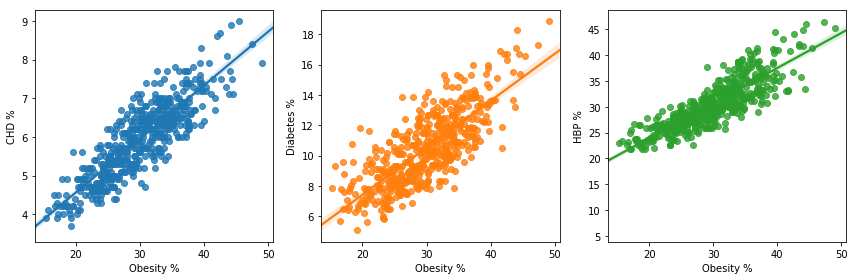

In [11]:
#Building in-line scatter plots w/ trend lines
#Cannot get color and size to work as I want
fig, axs = plt.subplots(ncols=3)
sns.regplot(x="Obesity %", y="CHD %", data=obesity_datavalue_df, fit_reg=True, ax=axs[0])
sns.regplot(x="Obesity %", y="Diabetes %", data=obesity_datavalue_df, fit_reg=True, ax=axs[1])
sns.regplot(x="Obesity %",y="HBP %", data=obesity_datavalue_df, fit_reg=True, ax=axs[2])
plt.tight_layout(rect=(0, 1, 2, 2))

## Building Sleep Data

In [12]:
# Create new dataframe for sleep
sleep_df= wc5_df.loc[wc5_df["Short_Question_Text"] == "Sleep <7 hours"]
sleep_df = sleep_df[["City", "State_x", "CityFIPS","Population", "Data_Value"]]
sleep_df = sleep_df.rename(columns={"State_x":"State", "Data_Value":"Sleep <7 hours %"})
sleep_df.head()

,City,State,CityFIPS,Population,Sleep <7 hours %
26,Birmingham,Alabama,107000.0,212295.0,41.8
53,Hoover,Alabama,135896.0,82264.0,32.8
81,Huntsville,Alabama,137000.0,182317.0,38.3
109,Mobile,Alabama,150000.0,195116.0,39.7
137,Montgomery,Alabama,151000.0,204760.0,38.1


In [13]:
# Create new dataframe for strokes
stroke_df= wc5_df.loc[wc5_df["Short_Question_Text"] == "Stroke"]
stroke_df = stroke_df[["City", "State_x", "CityFIPS","Population", "Data_Value"]]
stroke_df = stroke_df.rename(columns={"State_x":"State", "Data_Value":"Stroke %"})
stroke_df.head()

,City,State,CityFIPS,Population,Stroke %
24,Birmingham,Alabama,107000.0,212295.0,5.0
54,Hoover,Alabama,135896.0,82264.0,2.2
82,Huntsville,Alabama,137000.0,182317.0,3.3
110,Mobile,Alabama,150000.0,195116.0,4.2
138,Montgomery,Alabama,151000.0,204760.0,4.2


In [14]:
# Merge two dataframes using an inner join
sleep_stroke_df = pd.merge(sleep_df, stroke_df, on="CityFIPS")
sleep_stroke_df = sleep_stroke_df.rename(columns={"City_x":"City","State_x":"State", "Population_x":"Population"})
sleep_stroke_df = sleep_stroke_df[["City", "State","CityFIPS","Population","Sleep <7 hours %","Stroke %"]]
sleep_stroke_df.head()

,City,State,CityFIPS,Population,Sleep <7 hours %,Stroke %
0,Birmingham,Alabama,107000.0,212295.0,41.8,5.0
1,Hoover,Alabama,135896.0,82264.0,32.8,2.2
2,Huntsville,Alabama,137000.0,182317.0,38.3,3.3
3,Mobile,Alabama,150000.0,195116.0,39.7,4.2
4,Montgomery,Alabama,151000.0,204760.0,38.1,4.2


In [15]:
#We already have CHD dataframe.
#merge CHD dataframe into previous
sleep_CHD_df = pd.merge(sleep_stroke_df, CHD_df, on="CityFIPS")
sleep_CHD_df = sleep_CHD_df.rename(columns={"City_x":"City","State_x":"State", "Population_x":"Population"})
sleep_CHD_df = sleep_CHD_df[["City", "State","CityFIPS","Population","Sleep <7 hours %","Stroke %", "CHD %"]]
sleep_CHD_df.head()

,City,State,CityFIPS,Population,Sleep <7 hours %,Stroke %,CHD %
0,Birmingham,Alabama,107000.0,212295.0,41.8,5.0,7.5
1,Hoover,Alabama,135896.0,82264.0,32.8,2.2,5.1
2,Huntsville,Alabama,137000.0,182317.0,38.3,3.3,6.4
3,Mobile,Alabama,150000.0,195116.0,39.7,4.2,7.2
4,Montgomery,Alabama,151000.0,204760.0,38.1,4.2,6.9


In [16]:
#We already have a diabetes dataframe
#merge HBP dataframe into previous
sleep_data_df= pd.merge(sleep_CHD_df, diabetes_df, on="CityFIPS")
sleep_data_df= sleep_data_df.rename(columns={"City_x":"City","State_x":"State", "Population_x":"Population"})
sleep_data_df= sleep_data_df[["City", "State","CityFIPS","Population","Sleep <7 hours %","Stroke %", "CHD %", "Diabetes %"]]
sleep_data_df.head()

,City,State,CityFIPS,Population,Sleep <7 hours %,Stroke %,CHD %,Diabetes %
0,Birmingham,Alabama,107000.0,212295.0,41.8,5.0,7.5,16.7
1,Hoover,Alabama,135896.0,82264.0,32.8,2.2,5.1,8.0
2,Huntsville,Alabama,137000.0,182317.0,38.3,3.3,6.4,11.9
3,Mobile,Alabama,150000.0,195116.0,39.7,4.2,7.2,14.5
4,Montgomery,Alabama,151000.0,204760.0,38.1,4.2,6.9,13.9


## Building Sleep Vizes

In [17]:
# Build scatter plot
# This scatter plot will produce pretty colors
# sns.lmplot( x="Sleep <7 hours %, y="CHD %", data=sleep_data_df, fit_reg=False, hue="CityFIPS", 
#            legend=False, palette="Set3")
# plt.title("Sleep and Coronary Heart Disease")
# plt.show()

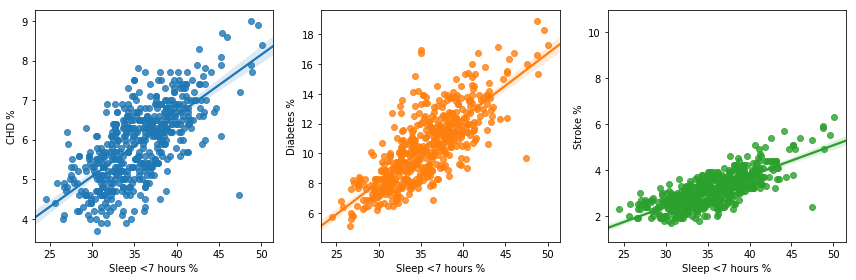

In [18]:
#Building in-line scatter plots w/ trend lines
#Cannot get color and size to work as I want
fig, axs = plt.subplots(ncols=3)
sns.regplot(x="Sleep <7 hours %", y="CHD %", data=sleep_data_df, fit_reg=True, ax=axs[0])
sns.regplot(x="Sleep <7 hours %", y="Diabetes %", data=sleep_data_df, fit_reg=True, ax=axs[1])
sns.regplot(x="Sleep <7 hours %",y="Stroke %", data=sleep_data_df, fit_reg=True, ax=axs[2])
plt.tight_layout(rect=(0, 1, 2, 2))

In [35]:
poverty_df = wc5_df.loc[wc5_df["Short_Question_Text"] == "Sleep <7 hours"]
poverty_df = poverty_df[["City", "State_x", "CityFIPS","Population", "Poverty Rate", "Unemployment Rate", "Household Income"]]
#poverty_df.head()

poverty_df= pd.merge(sleep_data_df, poverty_df, on="CityFIPS")
poverty_df = poverty_df[["City_x", "State_x", "CityFIPS","Population_x", "Poverty Rate", "Unemployment Rate", "Household Income", "Sleep <7 hours %"]]
poverty_df = poverty_df.rename(columns={"State_x":"State", "City_x": "City", "Population_x": "Population"})
poverty_df.head()

,City,State,CityFIPS,Population,Poverty Rate,Unemployment Rate,Household Income,Sleep <7 hours %
0,Birmingham,Alabama,107000.0,212295.0,29.326173,7.252644,31445.0,41.8
1,Hoover,Alabama,135896.0,82264.0,6.730769,3.397598,75020.0,32.8
2,Huntsville,Alabama,137000.0,182317.0,16.177318,6.053193,48881.0,38.3
3,Mobile,Alabama,150000.0,195116.0,22.513787,6.267554,38644.0,39.7
4,Montgomery,Alabama,151000.0,204760.0,21.866576,4.366087,43702.0,38.1


C:\Users\thoma\anaconda\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


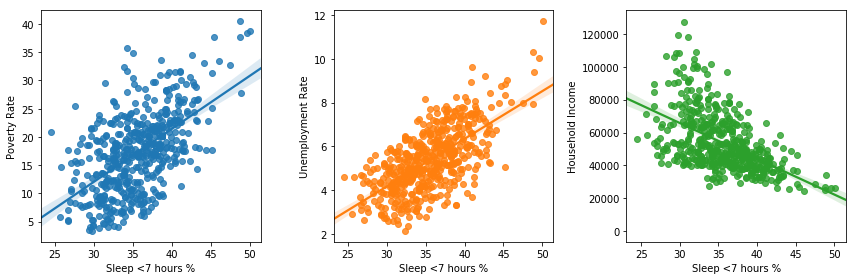

In [38]:
fig, axs = plt.subplots(ncols=3)
sns.regplot(x="Sleep <7 hours %", y="Poverty Rate", data=poverty_df, fit_reg=True, ax=axs[0])
sns.regplot(x="Sleep <7 hours %", y="Unemployment Rate", data=poverty_df, fit_reg=True, ax=axs[1])
sns.regplot(x="Sleep <7 hours %",y="Household Income", data=poverty_df, fit_reg=True, ax=axs[2])
plt.tight_layout(rect=(0, 1, 2, 2))

In [46]:
povertyVsHealth_df = wc5_df.loc[wc5_df["Short_Question_Text"] == "Sleep <7 hours"]
povertyVsHealth_df = povertyVsHealth_df[["City", "State_x", "CityFIPS","Population", "Poverty Rate", "Unemployment Rate", "Household Income"]]
#poverty_df.head()

povertyVsHealth_df= pd.merge(sleep_data_df, poverty_df, on="CityFIPS")
povertyVsHealth_df = povertyVsHealth_df[["City_x", "State_x", "CityFIPS","Population_x", "Poverty Rate", "Unemployment Rate", "Household Income", "CHD %", "Diabetes %", "Stroke %"]]
povertyVsHealth_df = povertyVsHealth_df.rename(columns={"State_x":"State", "City_x": "City", "Population_x": "Population"})
povertyVsHealth_df.head()

,City,State,CityFIPS,Population,Poverty Rate,Unemployment Rate,Household Income,CHD %,Diabetes %,Stroke %
0,Birmingham,Alabama,107000.0,212295.0,29.326173,7.252644,31445.0,7.5,16.7,5.0
1,Hoover,Alabama,135896.0,82264.0,6.730769,3.397598,75020.0,5.1,8.0,2.2
2,Huntsville,Alabama,137000.0,182317.0,16.177318,6.053193,48881.0,6.4,11.9,3.3
3,Mobile,Alabama,150000.0,195116.0,22.513787,6.267554,38644.0,7.2,14.5,4.2
4,Montgomery,Alabama,151000.0,204760.0,21.866576,4.366087,43702.0,6.9,13.9,4.2


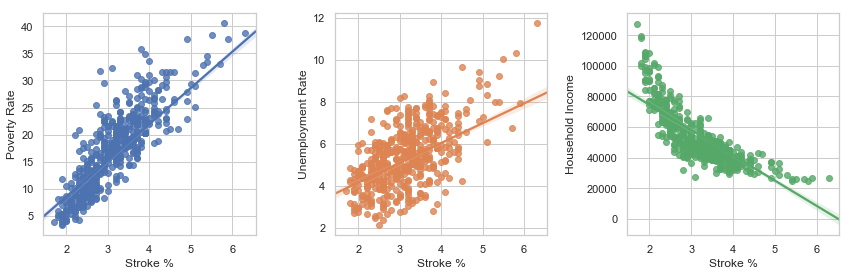

In [47]:
fig, axs = plt.subplots(ncols=3)
sns.regplot(x="Stroke %", y="Poverty Rate", data=povertyVsHealth_df, fit_reg=True, ax=axs[0])
sns.regplot(x="Stroke %", y="Unemployment Rate", data=povertyVsHealth_df, fit_reg=True, ax=axs[1])
sns.regplot(x="Stroke %",y="Household Income", data=povertyVsHealth_df, fit_reg=True, ax=axs[2])
plt.tight_layout(rect=(0, 1, 2, 2))

In [57]:
health_df = wc5_df.loc[wc5_df["Short_Question_Text"] == "Health Insurance"]
health_df = health_df[["City", "State_x", "CityFIPS","Population", "Poverty Rate", "Unemployment Rate", "Household Income", "Data_Value"]]
health_df = health_df.rename(columns={"State_x":"State", "City_x": "City", "Population_x": "Population", "Data_Value": "Lack of Health Insurance %"})
health_df= pd.merge(obesity_datavalue_df, health_df, on="CityFIPS")

health_df.head()



,City_x,State_x,CityFIPS,Population_x,Obesity %,CHD %,Diabetes %,HBP %,City_y,State_y,Population_y,Poverty Rate,Unemployment Rate,Household Income,Lack of Health Insurance %
0,Birmingham,Alabama,107000.0,212295.0,42.6,7.5,16.7,44.1,Birmingham,Alabama,212295.0,29.326173,7.252644,31445.0,19.5
1,Hoover,Alabama,135896.0,82264.0,28.9,5.1,8.0,29.7,Hoover,Alabama,82264.0,6.730769,3.397598,75020.0,10.6
2,Huntsville,Alabama,137000.0,182317.0,33.3,6.4,11.9,36.3,Huntsville,Alabama,182317.0,16.177318,6.053193,48881.0,15.4
3,Mobile,Alabama,150000.0,195116.0,39.7,7.2,14.5,41.0,Mobile,Alabama,195116.0,22.513787,6.267554,38644.0,17.4
4,Montgomery,Alabama,151000.0,204760.0,36.9,6.9,13.9,40.8,Montgomery,Alabama,204760.0,21.866576,4.366087,43702.0,18.0


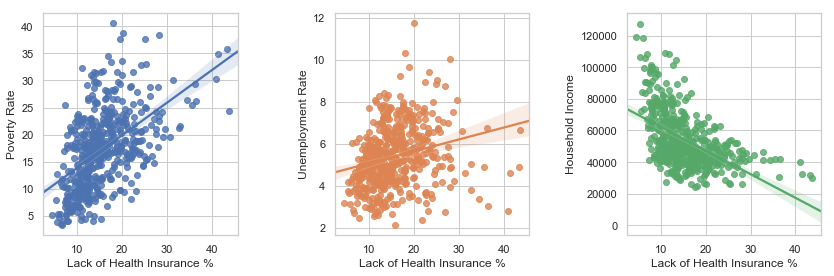

In [56]:
fig, axs = plt.subplots(ncols=3)
sns.regplot(x="Lack of Health Insurance %", y="Poverty Rate", data=health_df, fit_reg=True, ax=axs[0])
sns.regplot(x="Lack of Health Insurance %", y="Unemployment Rate", data=health_df, fit_reg=True, ax=axs[1])
sns.regplot(x="Lack of Health Insurance %",y="Household Income", data=health_df, fit_reg=True, ax=axs[2])
plt.tight_layout(rect=(0, 1, 2, 2))

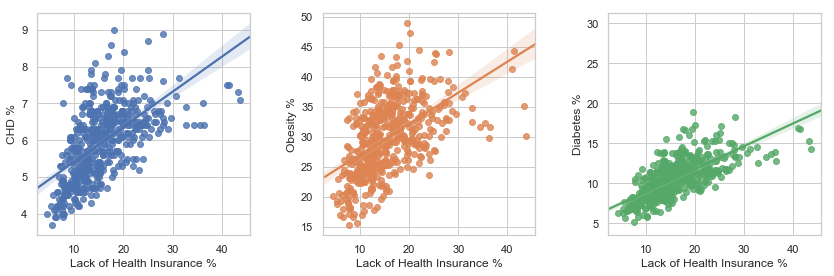

In [61]:
fig, axs = plt.subplots(ncols=3)
sns.regplot(x="Lack of Health Insurance %", y="CHD %", data=health_df, fit_reg=True, ax=axs[0])
sns.regplot(x="Lack of Health Insurance %", y="Obesity %", data=health_df, fit_reg=True, ax=axs[1])
sns.regplot(x="Lack of Health Insurance %",y="Diabetes %", data=health_df, fit_reg=True, ax=axs[2])
plt.tight_layout(rect=(0, 1, 2, 2))

In [40]:
weather_df = wc5_df.loc[wc5_df["Short_Question_Text"] == "Sleep <7 hours"]
weather_df = weather_df[["City", "State_x", "CityFIPS","Population", "Average Temperature"]]
#poverty_df.head()

weather_df= pd.merge(sleep_data_df, weather_df, on="CityFIPS")
weather_df = weather_df[["City_x", "State_x", "CityFIPS","Population_x", "Average Temperature", "Sleep <7 hours %"]]
weather_df = weather_df.rename(columns={"State_x":"State", "City_x": "City", "Population_x": "Population"})
weather_df.head()

,City,State,CityFIPS,Population,Average Temperature,Sleep <7 hours %
0,Birmingham,Alabama,107000.0,212295.0,63.0,41.8
1,Hoover,Alabama,135896.0,82264.0,63.0,32.8
2,Huntsville,Alabama,137000.0,182317.0,59.0,38.3
3,Mobile,Alabama,150000.0,195116.0,67.0,39.7
4,Montgomery,Alabama,151000.0,204760.0,64.0,38.1


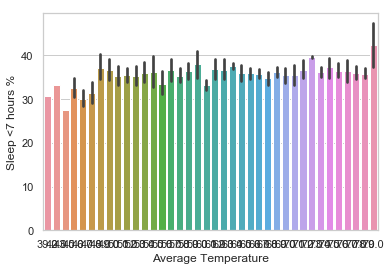

In [44]:
sns.set(style="whitegrid")
sns.barplot(x="Average Temperature", y="Sleep <7 hours %", data=weather_df)
